# Statistical learning

Machine learning is a technique with a growing importance, as the size of the datasets experimental sciences are facing is rapidly growing. Problems it tackles range from **building a prediction function** linking different observations, to **classifying observations**, or **learning the structure in an unlabeled dataset**.

This tutorial will explore *statistical learning*, the use of machine learning techniques with the *goal of statistical inference*: drawing conclusions on the data at hand.

Scikit-learn is a Python module integrating classic machine learning algorithms in the tightly-knit world of scientific Python packages (NumPy, SciPy, matplotlib).

## Statistical learning: the setting and the estimator object in scikit-learn

### Datasets
Scikit deals with data that is represented in 2D arrays. They can be understood as a list of multi-dimensional observations. 

The first axis is a sample axis, the second the features axis.

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
data = iris.data
data.shape

(150, 4)

In [3]:
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 150 (50 in each of three classes)\n:Number of Attributes: 4 numeric, predictive attributes and the class\n:Attribute Information:\n    - sepal length in cm\n    - sepal width in cm\n    - petal length in cm\n    - petal width in cm\n    - class:\n            - Iris-Setosa\n            - Iris-Versicolour\n            - Iris-Virginica\n\n:Summary Statistics:\n\n============== ==== ==== ======= ===== ====================\n                Min  Max   Mean    SD   Class Correlation\n============== ==== ==== ======= ===== ====================\nsepal length:   4.3  7.9   5.84   0.83    0.7826\nsepal width:    2.0  4.4   3.05   0.43   -0.4194\npetal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\npetal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n============== ==== ==== ======= ===== ====================\n\n:Missing Attribute Values: None\n:Class Distribution: 

son 150 observaciones of irises, each described by 4 features: sepal len, sepal width, petal length and petal width. There are 3 classes, 50 in each class.

#### Reshaping


In [4]:
digits = datasets.load_digits()
digits.images.shape

(1797, 8, 8)

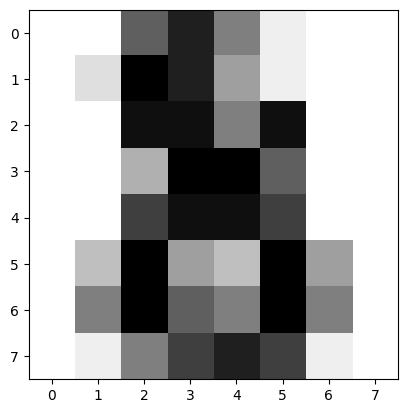

In [5]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r)

To use this dataset with scikit-learn, we transform each 8x8 image into a feature vector of length 64

In [6]:
data = digits.images.reshape((digits.images.shape[0], -1))
data.shape

(1797, 64)

### Estimator objects
Fitting data: the main API implemented by scikit-learn is that of the estimator. An estimator is any object that learns from data; it may be a classification, regression or clustering algorithm or a transformer that extracts/filters useful features from raw data.

All estimator objects expose a fit method that takes a dataset (usually a 2-d array):

>>> estimator.fit(data)

Estimator parameters: All the parameters of an estimator can be set when it is instantiated or by modifying the corresponding attribute:

>>> estimator = Estimator(param1=1, param2=2)
>>> estimator.param1

1
Estimated parameters: When data is fitted with an estimator, parameters are estimated from the data at hand. All the estimated parameters are attributes of the estimator object ending by an underscore:

>>> estimator.estimated_param_

## Aprendizaje supervisado: predecir una variable de observaciones de alta dimensión

El aprendizaje supervisado consiste en ligar dos datasets: una matriz de observaciones X y una variable externa y, que se busca predecir. 

La clasificación asigna observaciones en un conjunto de etiquetas finitas.

Regresión asigna un target continuo (numérico)

## Clasificación

### Nearest neighbor

Clasifica 3 tipos de irises (Setosa, Versicolour and Virginica) del tamaño (largo y ancho) de pétalo y sepal como características

In [7]:
import numpy as np
iris_X, iris_y = datasets.load_iris(return_X_y=True)
np.unique(iris_y) # Encuentra los elementos únicos de un arreglo y los devuelve en un arreglo ordenado.


array([0, 1, 2])

#### Clasificador k-Nearest neighbors


##### Training and test set

In [8]:
np.random.seed(0) # Genera seed
indices = np.random.permutation(len(iris_X)) # Permuta los elementos
# División del dataset y las etiquetas correspondientes
# Se toman todos los elementos excepto los últimos 10 para entrenamiento.
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test = iris_X[indices[-10:]]
iris_y_test = iris_y[indices[-10:]]


In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_y_train)


KNeighborsClassifier()

In [10]:
predict = knn.predict(iris_X_test) #Resultados de la predicción
print (predict)


[1 2 1 0 0 0 2 1 2 0]


In [11]:
iris_y_test # Resultados reales

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

## Regresión
en dataset de diabetes

In [12]:
import pandas as pd

In [13]:
help(datasets.load_diabetes)

Help on function load_diabetes in module sklearn.datasets._base:

load_diabetes(*, return_X_y=False, as_frame=False, scaled=True)
    Load and return the diabetes dataset (regression).

    ==============   ==================
    Samples total    442
    Dimensionality   10
    Features         real, -.2 < x < .2
    Targets          integer 25 - 346
    ==============   ==================

    .. note::
       The meaning of each feature (i.e. `feature_names`) might be unclear
       (especially for `ltg`) as the documentation of the original dataset is
       not explicit. We provide information that seems correct in regard with
       the scientific literature in this field of research.

    Read more in the :ref:`User Guide <diabetes_dataset>`.

    Parameters
    ----------
    return_X_y : bool, default=False
        If True, returns ``(data, target)`` instead of a Bunch object.
        See below for more information about the `data` and `target` object.

        .. versionadded:

In [14]:
diabetes_desc = datasets.load_diabetes()
print (diabetes_desc.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

### Get data and split

In [15]:
from sklearn.model_selection import train_test_split

# Cargar el conjunto de datos
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Dividir los datos en conjuntos de entrenamiento y prueba con mezcla
diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = train_test_split(
    diabetes_X, diabetes_y, test_size=0.2, random_state=42, shuffle=True
)
print(diabetes_X_train.shape, diabetes_X_test.shape)
print (diabetes_y_train.shape, diabetes_y_test.shape)

(353, 10) (89, 10)
(353,) (89,)


### Apply lr model

In [16]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

In [17]:
print (lr.coef_)

[  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]


#### Mean Squared Error

In [18]:
np.mean((lr.predict(diabetes_X_test) - diabetes_y_test) ** 2)

2900.193628493481

#### R^2

In [19]:
lr.score(diabetes_X_test, diabetes_y_test)

0.4526027629719196

### Shrinkage
cuando hay *pocas observaciones* por dimensión, el ruido de las observaciones inducen una alta varianza

In [20]:
X = np.c_[.5, 1].T
y = [.5, 1]
test = np.c_[ 0, 2].T
regr = linear_model.LinearRegression()

In [71]:
!pip install matplotlib

In [1]:
import matplotlib.pylot as plt

ModuleNotFoundError: No module named 'matplotlib.pylot'

In [78]:
import sys
print(sys.executable)


c:\Users\Gerardo\OneDrive\Documentos\Data Science\Sklearn Tutorials\venv\Scripts\python.exe


In [80]:
! "c:\Users\Gerardo\OneDrive\Documentos\Data Science\Sklearn Tutorials\venv\Scripts\python.exe" -m pip install matplotlib



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip list


Package                   Version
------------------------- --------------
anyio                     4.3.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     23.2.0
Babel                     2.14.0
beautifulsoup4            4.12.3
bleach                    6.1.0
certifi                   2024.2.2
cffi                      1.16.0
charset-normalizer        3.3.2
colorama                  0.4.6
comm                      0.2.2
contourpy                 1.2.1
cycler                    0.12.1
debugpy                   1.8.1
decorator                 5.1.1
defusedxml                0.7.1
executing                 2.0.1
fastjsonschema            2.19.1
fonttools                 4.51.0
fqdn                      1.5.1
h11                       0.14.0
httpcore                  1.0.5
httpx                     0.27.0
idna                      3.7
ipykernel        

In [3]:
import sys
print(sys.path)


['c:\\Users\\Gerardo\\OneDrive\\Documentos\\Data Science\\Sklearn Tutorials', 'C:\\Users\\Gerardo\\.pyenv\\pyenv-win\\versions\\3.12.1\\python312.zip', 'C:\\Users\\Gerardo\\.pyenv\\pyenv-win\\versions\\3.12.1\\DLLs', 'C:\\Users\\Gerardo\\.pyenv\\pyenv-win\\versions\\3.12.1\\Lib', 'C:\\Users\\Gerardo\\.pyenv\\pyenv-win\\versions\\3.12.1', 'c:\\Users\\Gerardo\\OneDrive\\Documentos\\Data Science\\Sklearn Tutorials\\venv', '', 'c:\\Users\\Gerardo\\OneDrive\\Documentos\\Data Science\\Sklearn Tutorials\\venv\\Lib\\site-packages', 'c:\\Users\\Gerardo\\OneDrive\\Documentos\\Data Science\\Sklearn Tutorials\\venv\\Lib\\site-packages\\win32', 'c:\\Users\\Gerardo\\OneDrive\\Documentos\\Data Science\\Sklearn Tutorials\\venv\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\Gerardo\\OneDrive\\Documentos\\Data Science\\Sklearn Tutorials\\venv\\Lib\\site-packages\\Pythonwin']


In [4]:
import matplotlib
print(matplotlib.__file__)


c:\Users\Gerardo\OneDrive\Documentos\Data Science\Sklearn Tutorials\venv\Lib\site-packages\matplotlib\__init__.py
